## Assignment 2, Data Mining

Put all deliverables into github repository in your profile. Share link to google form 24 hours before defense. Defend by explaining deliverables and answering questions.
Deliverables: .ipynb
Google form: https://docs.google.com/forms/d/e/1FAIpQLSe0GyNdOYlvM1tX_I_CtlPod5jBf-ACLGdHYZq1gVZbUeBzIg/viewform?usp=sf_link 

### Exercise 1: Feature Selection with SelectKBest

Objective: Use SelectKBest from scikit-learn to select the top k features from a dataset.

* 1.Load the Iris dataset from scikit-learn.

* 2.Split the dataset into features and target variable.

* 3.Use SelectKBest with the chi2 score function to select the top 2 features.

* 4.Print the selected feature names.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

# Load the Iris dataset
iris = load_iris()
X, y = pd.DataFrame(iris.data, columns=iris.feature_names), iris.target

# Select the top 2 features using chi-squared score
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

# Print the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['petal length (cm)', 'petal width (cm)']


### Exercise 2: Feature Importance with Random Forest

Objective: Use a Random Forest classifier to determine feature importance.

* 1.Load the Wine dataset from scikit-learn.

* 2.Split the dataset into training and testing sets.

* 3.Train a Random Forest classifier on the training data.

* 4.Extract and visualize feature importances.

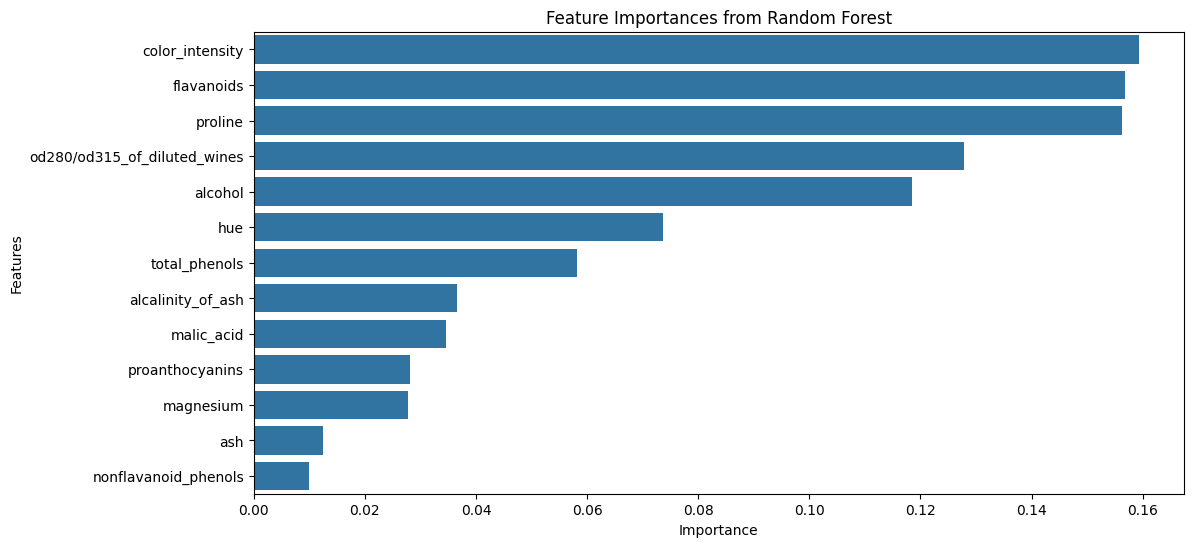

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the Wine dataset
wine = load_wine()
X, y = pd.DataFrame(wine.data, columns=wine.feature_names), wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Exercise 3: Recursive Feature Elimination (RFE)

Objective: Use Recursive Feature Elimination (RFE) to select features and evaluate model performance.

* 1.Load the Breast Cancer dataset from scikit-learn.

* 2.Split the dataset into training and testing sets.

* 3.Use RFE with a Support Vector Machine (SVM) classifier to select features.

* 4.Train an SVM model with the selected features and evaluate its performance.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = pd.DataFrame(cancer.data, columns=cancer.feature_names), cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RFE with SVM to select features
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Train an SVM model with the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
svc.fit(X_train_rfe, y_train)

# Evaluate the model's performance
y_pred = svc.predict(X_test_rfe)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8508771929824561


### Exercise 4: L1 Regularization for Feature Selection

Objective: Use L1 regularization (Lasso) for feature selection.

* 1.Load the Diabetes dataset from scikit-learn.

* 2.Split the dataset into training and testing sets.

* 3.Apply Lasso regression for feature selection.

* 4.Train a model using selected features and evaluate its performance.

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = pd.DataFrame(diabetes.data, columns=diabetes.feature_names), diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Lasso regression for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Train a model using selected features
selected_features = X.columns[lasso.coef_ != 0]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

lasso.fit(X_train_selected, y_train)
y_pred = lasso.predict(X_test_selected)

# Evaluate performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2798.242907511305
R-squared Score: 0.47184545850451176


## Classification Exercises

### Exercise 1: Logistic Regression

Objective: Build a logistic regression model to classify data.

* 1.Load the Iris dataset from scikit-learn.

* 2.Split the dataset into training and testing sets.

* 3.Train a logistic regression model on the training set.

* 4.Evaluate the model's performance on the test set using accuracy and a confusion matrix.

Accuracy: 1.0


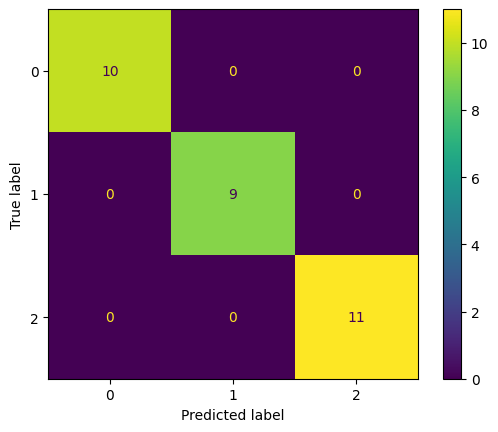

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the Iris dataset
iris = load_iris()
X, y = pd.DataFrame(iris.data, columns=iris.feature_names), iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Evaluate performance
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.show()

### Exercise 2: Support Vector Machine (SVM)

Objective: Use an SVM classifier to classify data.

* 1.Load the Breast Cancer dataset from scikit-learn.

* 2.Split the dataset into training and testing sets.

* 3.Train an SVM model on the training data.

* 4.Evaluate the model's performance on the test data using accuracy and a confusion matrix.

Accuracy: 0.9473684210526315


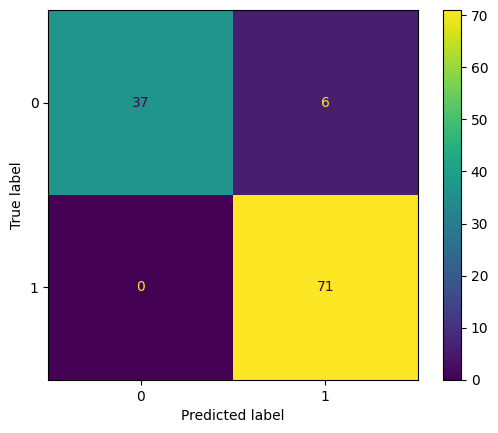

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = pd.DataFrame(cancer.data, columns=cancer.feature_names), cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate performance
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.show()

### Exercise 3: Decision Tree Classifier

Objective: Build a decision tree classifier and visualize it.

* 1.Load the Wine dataset from scikit-learn.

* 2.Split the dataset into training and testing sets.

* 3.Train a decision tree classifier on the training set.

* 4.Visualize the decision tree.

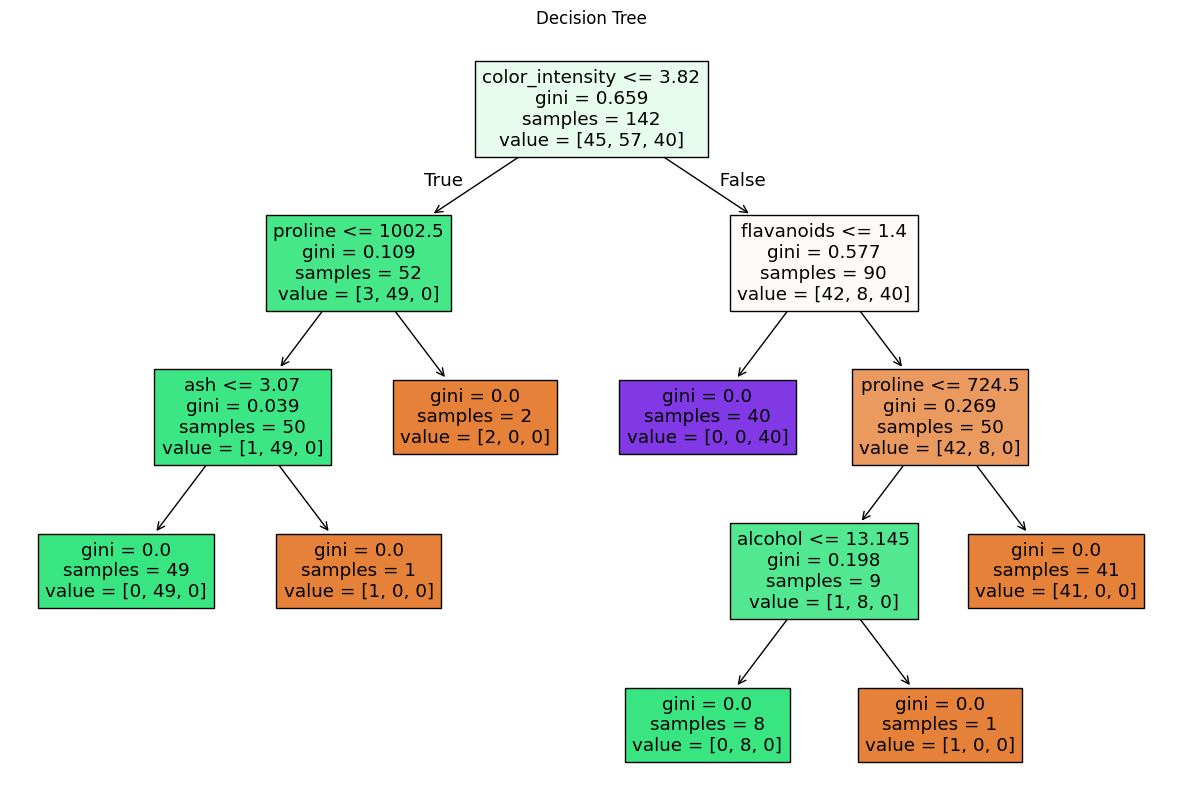

In [7]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Load the Wine dataset
wine = load_wine()
X, y = pd.DataFrame(wine.data, columns=wine.feature_names), wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns)
plt.title("Decision Tree")
plt.show()

## Regression Exercises

### Exercise 1: Linear Regression

Objective: Build a linear regression model to predict a continuous target variable.

* 1.Load the Boston Housing dataset from scikit-learn.

* 2.Split the dataset into training and testing sets.

* 3.Train a linear regression model on the training set.

* 4.Evaluate the model's performance using mean squared error (MSE) and R-squared score.

In [8]:
#Sanat Aidar
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the dataset from the local file
boston = pd.read_csv('BostonHousing.csv')

# Define the features (X) and target (y)
X = boston.iloc[:, :-1]  # Features
y = boston.iloc[:, -1]   # Target

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Evaluate performance
y_pred = lin_reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 24.404825188146212
R-squared Score: 0.6672089705941916


### Exercise 2: Ridge Regression

Objective: Use Ridge regression to perform regularized linear regression.

* 1.Load the Diabetes dataset from scikit-learn.

* 2.Split the dataset into training and testing sets.

* 3.Train a Ridge regression model on the training set.

* 4.Evaluate the model's performance using mean squared error (MSE) and R-squared score.

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = pd.DataFrame(diabetes.data, columns=diabetes.feature_names), diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Ridge regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Evaluate performance
y_pred = ridge_reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3077.41593882723
R-squared Score: 0.41915292635986545


### Exercise 3: Decision Tree Regression

Objective: Build a decision tree regression model and visualize it.

* 1.Load the Boston Housing dataset from scikit-learn.
  
* 2.Split the dataset into training and testing sets.
  
* 3.Train a decision tree regressor on the training set.
  
* 4.Evaluate the model's performance using mean squared error (MSE).
  
* 5.Visualize the decision tree.

Mean Squared Error: 16.460686274509804


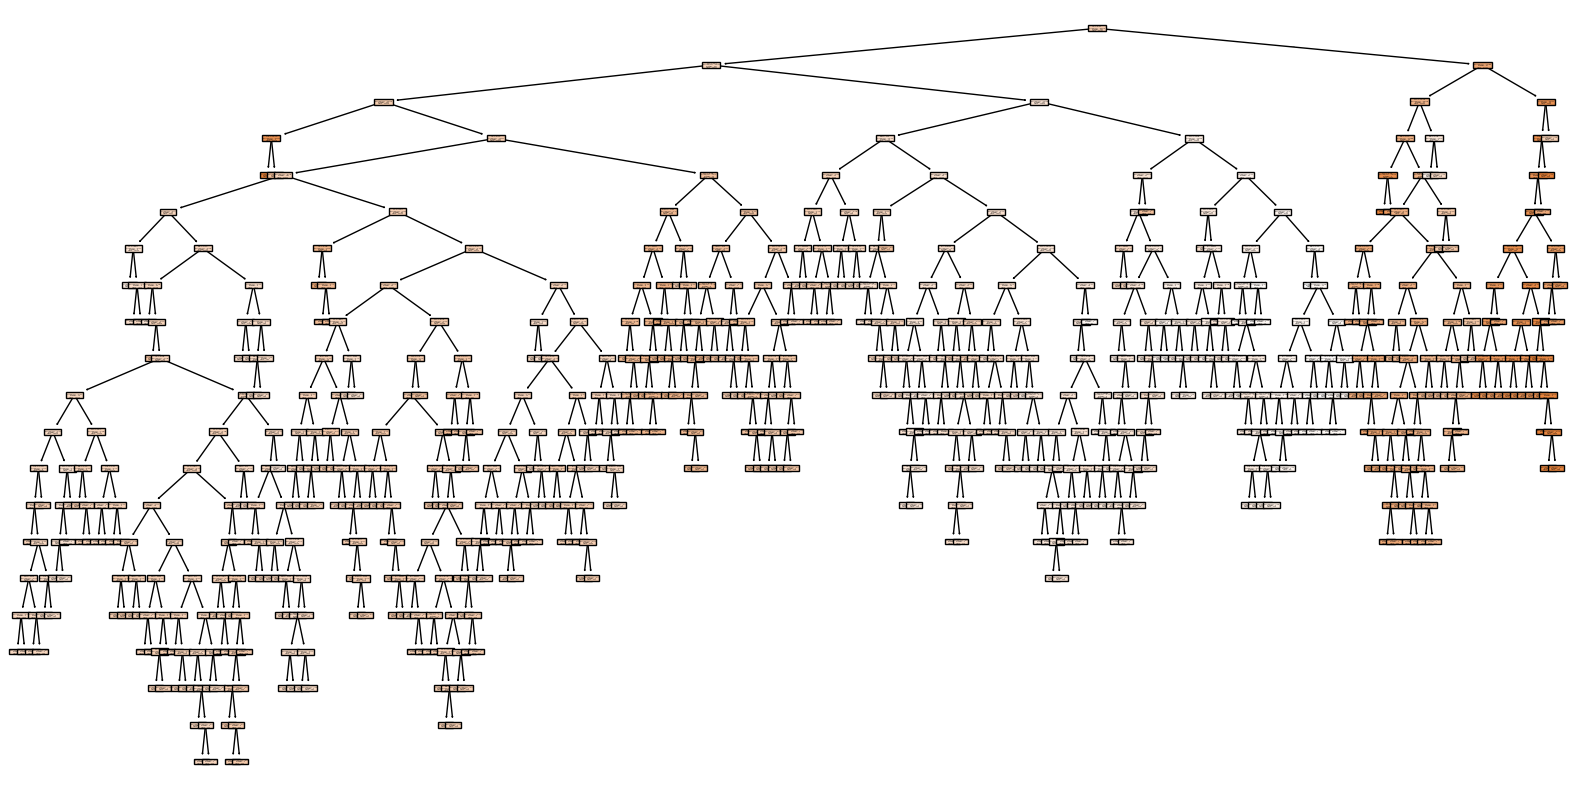

In [10]:
# Импорт необходимых библиотек
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# Загрузка датасета из файла
boston = pd.read_csv('BostonHousing.csv')

# Определение признаков (X) и целевой переменной (y)
X = boston.iloc[:, :-1]  # Все колонки, кроме последней (признаки)
y = boston.iloc[:, -1]   # Последняя колонка (целевая переменная)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Оценка модели с помощью MSE
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Визуализация дерева решений
plt.figure(figsize=(20, 10))  # Размер изображения для более четкой визуализации
tree.plot_tree(tree_reg, feature_names=X.columns, filled=True)
plt.show()
